### NLP Playground

Mostly playing around [this](https://www.youtube.com/playlist?list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX) really helpful & concise playlist.
> Caution: Do not take anything inside this notebook seriously

In [34]:
import pandas as pd
import numpy as np

import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [2]:
url="https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/9_bag_of_words/movies_sentiment_data.csv"
df =pd.read_csv(url)

df.head()

,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive
1,I enjoyed the movie and the story immensely! I...,positive
2,I had a hard time sitting through this. Every ...,negative
3,It's hard to imagine that anyone could find th...,negative
4,This is one military drama I like a lot! Tom B...,positive


In [4]:
# this df has 19k rows, i won't be needing that much for just playing around, so let's sample
df = df.sample(n=5000, random_state=42)
df.head()

,review,sentiment
5116,"Well, what can i say about this movie. I'm spe...",negative
15667,I'm aware that there are some fans who might l...,negative
7969,"Saw this used DVD cheap, and got it for a chuc...",negative
15277,I remember hearing about this movie and how it...,positive
10952,I went into this movie with very little in ter...,negative


In [5]:
# load english language model
nlp = spacy.load("en_core_web_md") 

def preprocess(text:str)->str:
    """Simply remove stop words and lemmatize"""
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

<AxesSubplot: xlabel='sentiment', ylabel='count'>

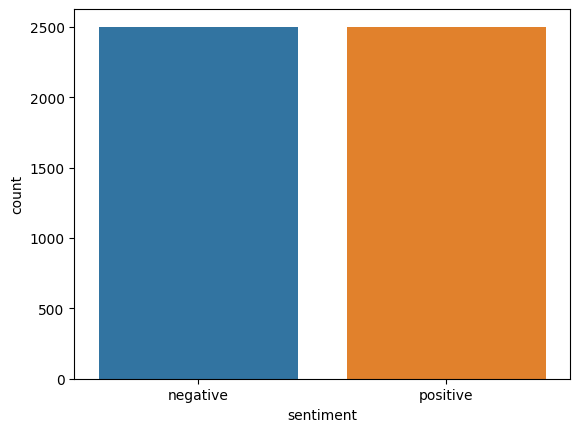

In [6]:
# Lets see the class distribution too
import seaborn as sns

sns.countplot(df, x="sentiment")

# wow its pretty balanced, sadly its never the case in real world :(

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, stratify=df.sentiment, random_state=42)
len(X_train), len(X_test)

(3750, 1250)

In [8]:
y_train.value_counts()

positive    1875
negative    1875
Name: sentiment, dtype: int64

### Bag of words

In [9]:
bow_vectorizer = CountVectorizer(ngram_range=(1,1)) # only 1-gram
X_train_features = bow_vectorizer.fit_transform(X_train)
X_test_features = bow_vectorizer.transform(X_test)

In [10]:
arr = X_train_features.toarray() # what a sparse array
arr[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
arr.shape #34.2k words? damn

(3750, 34451)

In [12]:
bow_vectorizer.get_feature_names_out() # Well looks like most of them are stop words

array(['00', '000', '00001', ..., 'über', 'üvegtigris', 'üzümcü'],
      dtype=object)

In [13]:
bow_vectorizer.vocabulary_

{'must': 20385,
 'admit': 816,
 'out': 21695,
 'of': 21332,
 'the': 30683,
 'eros': 10390,
 'movie': 20230,
 'collection': 6098,
 'this': 30785,
 'has': 13914,
 'to': 31042,
 'be': 2868,
 'one': 21452,
 'that': 30672,
 'love': 18223,
 'most': 20157,
 'as': 2005,
 'well': 33505,
 'other': 21672,
 'have': 13974,
 'also': 1269,
 'reviewed': 25585,
 'story': 29325,
 'is': 16167,
 'something': 28441,
 'really': 24714,
 'keeps': 16847,
 'you': 34254,
 'watching': 33367,
 'lot': 18190,
 'films': 11449,
 'plot': 23090,
 'looks': 18135,
 'like': 17870,
 'hammer': 13721,
 'broke': 4190,
 'it': 16210,
 'in': 15363,
 'pieces': 22847,
 'before': 2977,
 'production': 23785,
 'when': 33584,
 'watch': 33358,
 'all': 1199,
 'centering': 5141,
 'around': 1936,
 'sex': 27198,
 'and': 1472,
 'who': 33655,
 'can': 4683,
 'get': 12693,
 'with': 33862,
 'how': 14800,
 'many': 18777,
 'different': 8501,
 'people': 22508,
 'come': 6179,
 'end': 10121,
 'film': 11431,
 'oh': 21378,
 'dear': 7789,
 'god': 12942,

In [14]:
X_train[17888]

"Some films just simply should not be remade. This is one of them. In and of itself it is not a bad film. But it fails to capture the flavor and the terror of the 1963 film of the same title. Liam Neeson was excellent as he always is, and most of the cast holds up, with the exception of Owen Wilson, who just did not bring the right feel to the character of Luke. But the major fault with this version is that it strayed too far from the Shirley Jackson story in it's attempts to be grandiose and lost some of the thrill of the earlier film in a trade off for snazzier special effects. Again I will say that in and of itself it is not a bad film. But you will enjoy the friction of terror in the older version much more."

In [15]:
# Lets see the corresponding vector for this
np.where(arr[0]!=0)

(array([   17,   816,  1199,  1247,  1269,  1472,  1936,  2005,  2160,
         2868,  2918,  2977,  3654,  3948,  4190,  4476,  4683,  5141,
         5251,  5279,  6098,  6179,  6194,  6743,  7789,  8501,  8996,
         9033, 10121, 10161, 10390, 10564, 10603, 11261, 11431, 11449,
        11537, 11866, 12693, 12942, 13243, 13516, 13620, 13721, 13914,
        13974, 14237, 14800, 15363, 16167, 16210, 16224, 16847, 17019,
        17475, 17550, 17870, 18135, 18186, 18190, 18223, 18591, 18661,
        18777, 19718, 20157, 20230, 20385, 20503, 20775, 21057, 21332,
        21378, 21445, 21452, 21672, 21695, 21772, 22508, 22621, 22847,
        23090, 23785, 23940, 24106, 24714, 24920, 25585, 26386, 27061,
        27198, 27325, 28326, 28435, 28441, 29325, 30248, 30672, 30683,
        30696, 30736, 30785, 30956, 31042, 32464, 33280, 33348, 33358,
        33367, 33505, 33584, 33655, 33843, 33862, 33915, 33933, 33976,
        34254]),)

In [16]:
arr[0][16162]

0

In [17]:
# lets see what word do we have at index 173
bow_vectorizer.get_feature_names_out()[16162]

'irvin'

In [18]:
# Lets train a simple multinomial bias classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [19]:
clf = MultinomialNB()
clf.fit(X_train_features, y_train)

y_pred = clf.predict(X_test_features)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.88      0.83       625
    positive       0.86      0.77      0.81       625

    accuracy                           0.82      1250
   macro avg       0.83      0.82      0.82      1250
weighted avg       0.83      0.82      0.82      1250



In [20]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_features, y_train)

y_pred = clf.predict(X_test_features)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.85      0.86       625
    positive       0.85      0.86      0.86       625

    accuracy                           0.86      1250
   macro avg       0.86      0.86      0.86      1250
weighted avg       0.86      0.86      0.86      1250



### N-grams

In [23]:
ngram_vectorizer = CountVectorizer(ngram_range=(1,2)) # uni-gram and bigram
X_train_features = ngram_vectorizer.fit_transform(X_train)
X_test_features = ngram_vectorizer.transform(X_test)

In [25]:
ngram_vectorizer.vocabulary_

{'must': 217038,
 'admit': 7771,
 'out': 240881,
 'of': 227757,
 'the': 319884,
 'eros': 106657,
 'movie': 213831,
 'collection': 71685,
 'this': 332669,
 'has': 144381,
 'to': 337875,
 'be': 38215,
 'one': 235560,
 'that': 317583,
 'love': 196295,
 'most': 212530,
 'as': 29461,
 'well': 363937,
 'other': 239809,
 'have': 145469,
 'also': 12735,
 'reviewed': 271756,
 'story': 305895,
 'is': 170779,
 'something': 298073,
 'really': 265694,
 'keeps': 181940,
 'you': 379530,
 'watching': 362021,
 'lot': 195998,
 'films': 119702,
 'plot': 252023,
 'looks': 195432,
 'like': 190878,
 'hammer': 142856,
 'broke': 53948,
 'it': 174247,
 'in': 162484,
 'pieces': 249843,
 'before': 41792,
 'production': 258179,
 'when': 366231,
 'watch': 361628,
 'all': 11060,
 'centering': 63891,
 'around': 28708,
 'sex': 286118,
 'and': 16452,
 'who': 368505,
 'can': 60010,
 'get': 133035,
 'with': 371923,
 'how': 157863,
 'many': 201153,
 'different': 90718,
 'people': 246712,
 'come': 72214,
 'end': 103698,
 

In [29]:
X_train_features.shape # 381k feature? holy fk, my poor ram :(

(3750, 381687)

In [31]:
clf = MultinomialNB()
clf.fit(X_train_features, y_train)

y_pred = clf.predict(X_test_features)
print(classification_report(y_test, y_pred)) # f1 increased by 3%, but at expense of what? my poor ram

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86       625
    positive       0.88      0.80      0.84       625

    accuracy                           0.85      1250
   macro avg       0.85      0.85      0.85      1250
weighted avg       0.85      0.85      0.85      1250



In [33]:
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_features, y_train)

y_pred = clf.predict(X_test_features)
print(classification_report(y_test, y_pred)) # So much computation for what? for similar result? shhhhhh

              precision    recall  f1-score   support

    negative       0.86      0.85      0.86       625
    positive       0.86      0.86      0.86       625

    accuracy                           0.86      1250
   macro avg       0.86      0.86      0.86      1250
weighted avg       0.86      0.86      0.86      1250



### TF-IDF

In [81]:
tfidf_vectorizer = TfidfVectorizer()
X_train_features = tfidf_vectorizer.fit_transform(X_train)
X_test_features = tfidf_vectorizer.transform(X_test)

In [82]:
tfidf_vectorizer.vocabulary_

{'must': 20385,
 'admit': 816,
 'out': 21695,
 'of': 21332,
 'the': 30683,
 'eros': 10390,
 'movie': 20230,
 'collection': 6098,
 'this': 30785,
 'has': 13914,
 'to': 31042,
 'be': 2868,
 'one': 21452,
 'that': 30672,
 'love': 18223,
 'most': 20157,
 'as': 2005,
 'well': 33505,
 'other': 21672,
 'have': 13974,
 'also': 1269,
 'reviewed': 25585,
 'story': 29325,
 'is': 16167,
 'something': 28441,
 'really': 24714,
 'keeps': 16847,
 'you': 34254,
 'watching': 33367,
 'lot': 18190,
 'films': 11449,
 'plot': 23090,
 'looks': 18135,
 'like': 17870,
 'hammer': 13721,
 'broke': 4190,
 'it': 16210,
 'in': 15363,
 'pieces': 22847,
 'before': 2977,
 'production': 23785,
 'when': 33584,
 'watch': 33358,
 'all': 1199,
 'centering': 5141,
 'around': 1936,
 'sex': 27198,
 'and': 1472,
 'who': 33655,
 'can': 4683,
 'get': 12693,
 'with': 33862,
 'how': 14800,
 'many': 18777,
 'different': 8501,
 'people': 22508,
 'come': 6179,
 'end': 10121,
 'film': 11431,
 'oh': 21378,
 'dear': 7789,
 'god': 12942,

In [83]:
tfidf_vectorizer.idf_

array([6.66482839, 5.76404185, 8.53663057, ..., 8.53663057, 8.53663057,
       8.53663057])

In [84]:
np.where(X_train_features.toarray()[0]!=0)

(array([   17,   816,  1199,  1247,  1269,  1472,  1936,  2005,  2160,
         2868,  2918,  2977,  3654,  3948,  4190,  4476,  4683,  5141,
         5251,  5279,  6098,  6179,  6194,  6743,  7789,  8501,  8996,
         9033, 10121, 10161, 10390, 10564, 10603, 11261, 11431, 11449,
        11537, 11866, 12693, 12942, 13243, 13516, 13620, 13721, 13914,
        13974, 14237, 14800, 15363, 16167, 16210, 16224, 16847, 17019,
        17475, 17550, 17870, 18135, 18186, 18190, 18223, 18591, 18661,
        18777, 19718, 20157, 20230, 20385, 20503, 20775, 21057, 21332,
        21378, 21445, 21452, 21672, 21695, 21772, 22508, 22621, 22847,
        23090, 23785, 23940, 24106, 24714, 24920, 25585, 26386, 27061,
        27198, 27325, 28326, 28435, 28441, 29325, 30248, 30672, 30683,
        30696, 30736, 30785, 30956, 31042, 32464, 33280, 33348, 33358,
        33367, 33505, 33584, 33655, 33843, 33862, 33915, 33933, 33976,
        34254]),)

In [85]:
X_train_features.toarray()[0][816]

0.08842250636908118

In [86]:
tfidf_vectorizer.get_feature_names_out()[816]

'admit'

In [87]:
clf = MultinomialNB()
clf.fit(X_train_features, y_train)

y_pred = clf.predict(X_test_features)
print(classification_report(y_test, y_pred)) # The f1 infact went down man

              precision    recall  f1-score   support

    negative       0.79      0.91      0.85       625
    positive       0.89      0.76      0.82       625

    accuracy                           0.84      1250
   macro avg       0.84      0.84      0.83      1250
weighted avg       0.84      0.84      0.83      1250



In [88]:
clf = LogisticRegression(max_iter=300)
clf.fit(X_train_features, y_train)

y_pred = clf.predict(X_test_features)
print(classification_report(y_test, y_pred)) # So much computation for what? for similar result? shhhhhh

              precision    recall  f1-score   support

    negative       0.86      0.85      0.86       625
    positive       0.85      0.86      0.86       625

    accuracy                           0.86      1250
   macro avg       0.86      0.86      0.86      1250
weighted avg       0.86      0.86      0.86      1250



### Lets move on to word embeddings

In [106]:
reviews = df["review"].values

In [112]:
import tqdm

vectors = [nlp(txt).vector for txt in tqdm.tqdm(reviews)]

100%|██████████| 5000/5000 [07:30<00:00, 11.09it/s]


In [114]:
df["spacy_vectors"] = vectors

In [115]:
df.head()

,review,sentiment,spacy_vectors
5116,"Well, what can i say about this movie. I'm spe...",negative,"[-1.312401, 1.3320985, -2.7928927, -1.5679015,..."
15667,I'm aware that there are some fans who might l...,negative,"[-1.1210872, 0.79573244, -1.6768031, -0.754495..."
7969,"Saw this used DVD cheap, and got it for a chuc...",negative,"[-1.585176, 1.0851974, -1.6931499, 0.27679545,..."
15277,I remember hearing about this movie and how it...,positive,"[-1.4434338, 1.3262302, -2.7403343, -0.3738699..."
10952,I went into this movie with very little in ter...,negative,"[-1.6051551, 0.9862447, -2.3066986, -0.4822422..."


In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    df.spacy_vectors.values,
    df.sentiment.values,
    test_size=0.2,
    random_state=42,
    stratify=df.sentiment
)

In [135]:
print(X_train.shape)
X_train_2d = np.stack(X_train)
print(X_train_2d.shape)

(4000,)
(4000, 300)


In [136]:
print(X_test.shape)
X_test_2d = np.stack(X_test)
print(X_test_2d.shape)

(1000,)
(1000, 300)


In [137]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X_train_2d_scaled = scalar.fit_transform(X_train_2d)
X_test_2d_scaled = scalar.transform(X_test_2d)

In [138]:
clf = MultinomialNB()
clf.fit(X_train_2d_scaled, y_train)

y_pred = clf.predict(X_test_2d_scaled)
print(classification_report(y_test, y_pred)) # tf happened?

              precision    recall  f1-score   support

    negative       0.61      0.66      0.64       500
    positive       0.63      0.58      0.60       500

    accuracy                           0.62      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.62      0.62      0.62      1000



In [141]:
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)
print(classification_report(y_test, y_pred)) # This is sad, need to debug what went wrong

              precision    recall  f1-score   support

    negative       0.81      0.83      0.82       500
    positive       0.83      0.81      0.82       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



In [142]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)
print(classification_report(y_test, y_pred)) # Even such good embeddings are giving so poor result, maybe text preprocessing will do the trick

              precision    recall  f1-score   support

    negative       0.64      0.73      0.68       500
    positive       0.69      0.60      0.64       500

    accuracy                           0.66      1000
   macro avg       0.67      0.66      0.66      1000
weighted avg       0.67      0.66      0.66      1000

